# Clustering Wellness Data with PCA
This notebook demonstrates how to use clustering techniques and PCA to find patterns in a simulated wellness dataset.

In [117]:
#import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## Creating our own dataset based on Stress, Obesity, Sleep, Eating healthy, and Exercising.

In [118]:
# Create the synthetic dataset
# This dataset simulates a health and wellness program with various features
np.random.seed(42)
data = pd.DataFrame({
    'Exercise_Minutes': np.random.normal(30, 10, 300),
    'Healthy_Meals': np.random.randint(1, 4, 300),
    'Sleep_Hours': np.random.normal(7, 1.5, 300),
    'Stress_Level': np.random.randint(1, 10, 300),
    'BMI': np.random.normal(25, 4, 300)
})
data.head()

,Exercise_Minutes,Healthy_Meals,Sleep_Hours,Stress_Level,BMI
0,34.967142,1,6.577922,4,24.671395
1,28.617357,2,4.502960,3,29.469183
2,36.476885,1,6.990701,5,26.370901
3,45.230299,1,7.604679,8,26.827013
4,27.658466,3,8.684017,4,27.279069


### Data Preprocessing

In [119]:

# Check for missing values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data.head()

,Exercise_Minutes,Healthy_Meals,Sleep_Hours,Stress_Level,BMI
0,34.967142,1,6.577922,4,24.671395
1,28.617357,2,4.502960,3,29.469183
2,36.476885,1,6.990701,5,26.370901
3,45.230299,1,7.604679,8,26.827013
4,27.658466,3,8.684017,4,27.279069


## Exploratory Data Analysis
We examine feature relationships using a correlation heatmap.

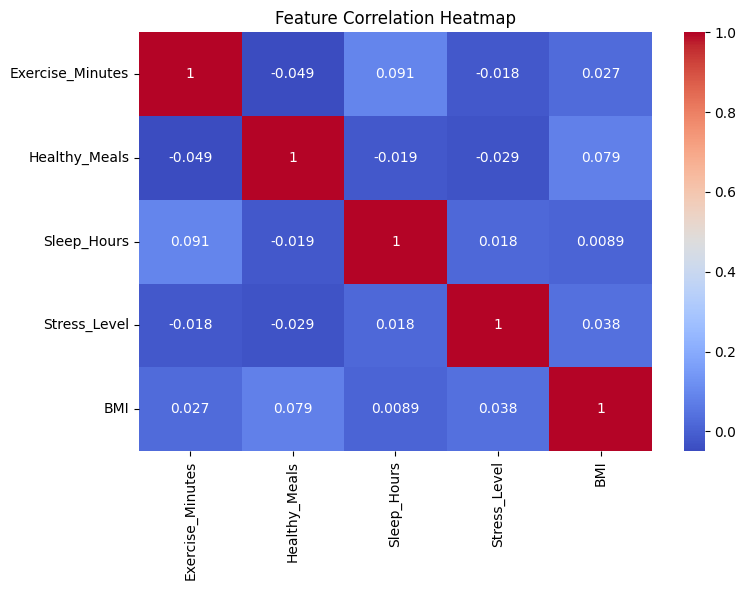

In [120]:

#Looging at the distribution of each feature
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

## Hierarchical Clustering
We use single linkage and plot a dendrogram to see how data groups naturally.

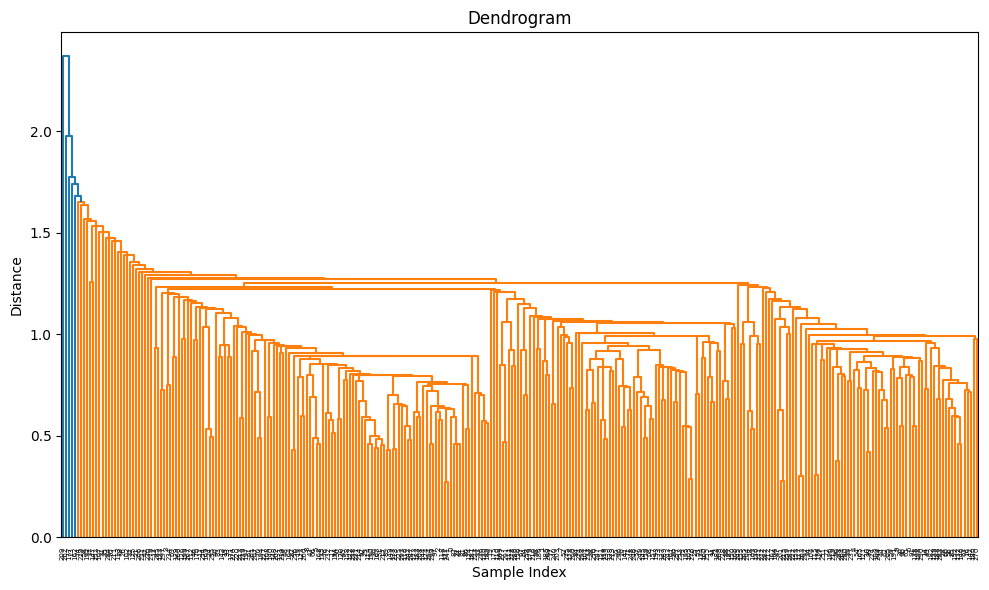

In [121]:
# Perform hierarchical clustering using single linkage
linkage_matrix_single = linkage(data_scaled, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_single)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


In [122]:

# Single Linkage Clustering with 3 clusters
single_model = AgglomerativeClustering(n_clusters=3, linkage='single')
cluster_labels = single_model.fit_predict(data_scaled)

# Silhouette Score
silhouette = silhouette_score(data_scaled, cluster_labels)
print("Silhouette Score:", round(silhouette, 2))

#Centroids 
cluster_0 = data_scaled[cluster_labels == 0]
cluster_1 = data_scaled[cluster_labels == 1]
cluster_2 = data_scaled[cluster_labels == 2]

centroid_0 = np.mean(cluster_0, axis=0)
centroid_1 = np.mean(cluster_1, axis=0)
centroid_2 = np.mean(cluster_2, axis=0)

# Within-Cluster Sum of Squares (WCSS)
wcss_0 = np.sum((cluster_0 - centroid_0) ** 2)
wcss_1 = np.sum((cluster_1 - centroid_1) ** 2)
wcss_2 = np.sum((cluster_2 - centroid_2) ** 2)

total_wcss = wcss_0 + wcss_1 + wcss_2
print("Within-Cluster Sum of Squares (WCSS):", round(total_wcss, 2))


Silhouette Score: 0.24
Within-Cluster Sum of Squares (WCSS): 1462.8


## Dimensionality Reduction (PCA)
PCA helps us reduce the data to 2 components that explain most of the variance.

In [123]:
# Using Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)
print('Explained variance by 2 components:', pca.explained_variance_ratio_.sum())

Explained variance by 2 components: 0.4376679150337057


In [124]:
## Even though the PCA explained variance is accounting for only 50% of the variance, it is still useful for visualization but it does show that the data is somewhat complex. 

Silhouette Score (PCA): 0.32


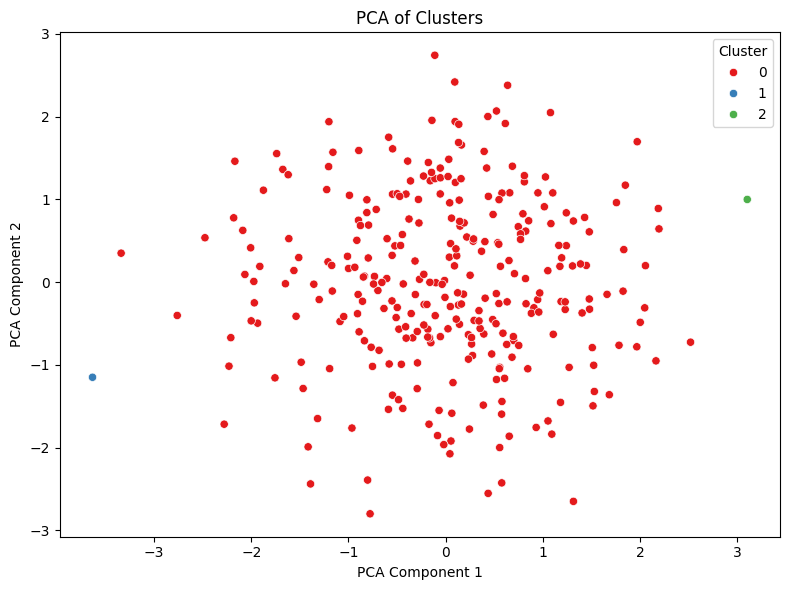

Within-Cluster Sum of Squares (WCSS) for PCA: 631.35


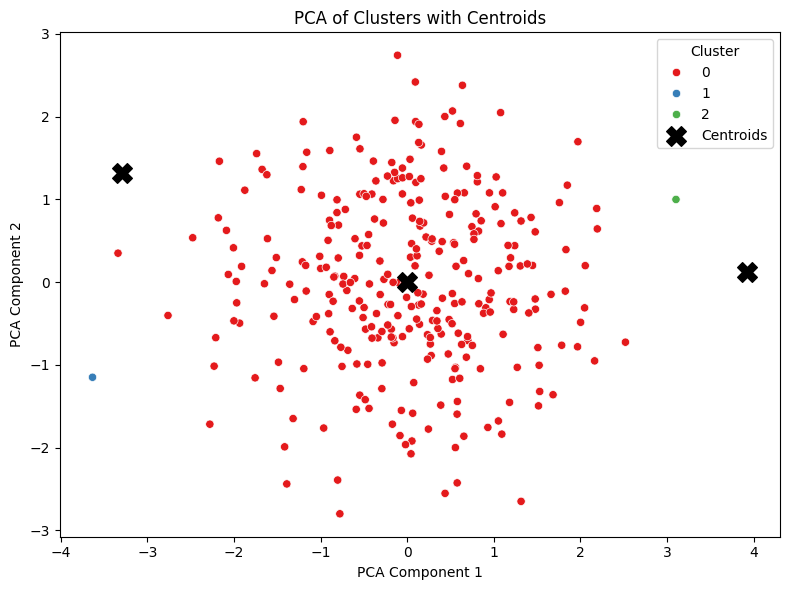

In [125]:
## Rerun the clustering on PCA data
pca_model = AgglomerativeClustering(n_clusters=3, linkage='single')
pca_cluster_labels = pca_model.fit_predict(pca_data)
# Silhouette Score
pca_silhouette = silhouette_score(pca_data, pca_cluster_labels)
print("Silhouette Score (PCA):", round(pca_silhouette, 2))
# Plotting the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_cluster_labels, palette='Set1')
plt.title('PCA of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
# WCSS for PCA clusters
pca_cluster_0 = pca_data[pca_cluster_labels == 0]
pca_cluster_1 = pca_data[pca_cluster_labels == 1]
pca_cluster_2 = pca_data[pca_cluster_labels == 2]
pca_centroid_0 = np.mean(pca_cluster_0, axis=0)
pca_centroid_1 = np.mean(pca_cluster_1, axis=0)
pca_centroid_2 = np.mean(pca_cluster_2, axis=0)
pca_wcss_0 = np.sum((pca_cluster_0 - pca_centroid_0) ** 2)
pca_wcss_1 = np.sum((pca_cluster_1 - pca_centroid_1) ** 2)
pca_wcss_2 = np.sum((pca_cluster_2 - pca_centroid_2) ** 2)
total_pca_wcss = pca_wcss_0 + pca_wcss_1 + pca_wcss_2
print("Within-Cluster Sum of Squares (WCSS) for PCA:", round(total_pca_wcss, 2))
# Plotting the PCA results with centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_cluster_labels, palette='Set1')
centroids = np.array([centroid_0, centroid_1, centroid_2])
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('PCA of Clusters with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

## K-Means Clustering
We test K values from 2 to 6 and evaluate using silhouette scores to find the best cluster count.

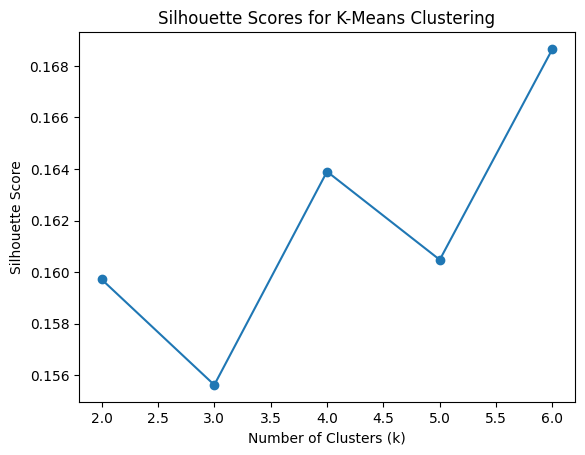

In [126]:
# Finding the optimal number of clusters using the silhouette method
k_range = range(2, 7)
scores = [silhouette_score(data_scaled, KMeans(n_clusters=k, n_init=10).fit_predict(data_scaled)) for k in k_range]

plt.plot(list(k_range), scores, marker='o')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

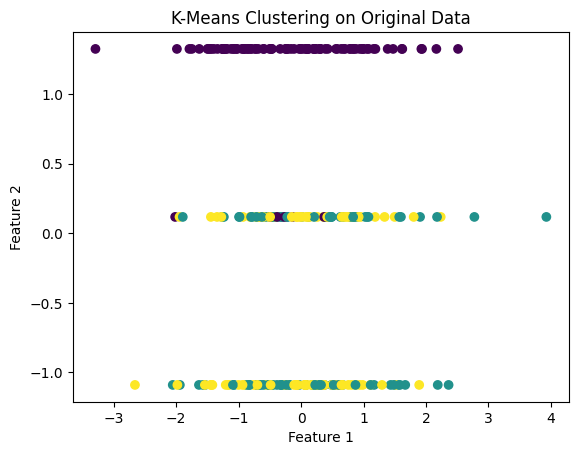

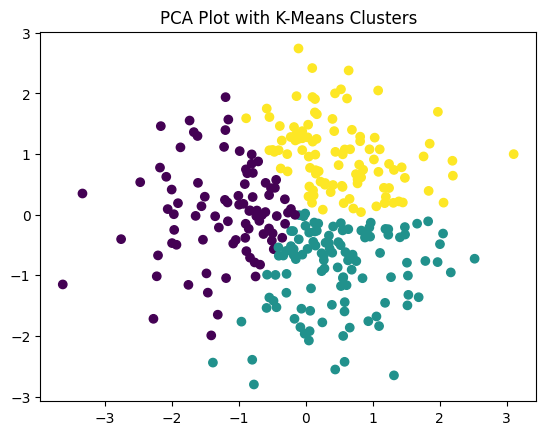

In [127]:
# k-means clustering before PCA
kmeans = KMeans(n_clusters=3, n_init=10)
clusters = kmeans.fit_predict(data_scaled)     
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# k-means clustering after PCA
kmeans = KMeans(n_clusters=3, n_init=10)
clusters = kmeans.fit_predict(pca_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.title('PCA Plot with K-Means Clusters')
plt.show()


## Conclusion
Even though the results showed that 3, 4, or 5 clusters would be the ideal number, the increase in silhouette score was nominal so to simply groups.
We chose to stick with three wellness groups using clustering. PCA helped simplify the data and improved clustering results shown by the increased silhouette score of at least 0.3
The Within Cluster Sum of Squares also improved and the value decreased from 
Silhouette Score (Single Linkage): 0.24  to a Silhouette Score after PCA of 0.32. This shows some structure but not clearly separated and some overlap between groupings.
Within-Cluster Sum of Squares (WCSS): 1462.8   to 631.35 after PCA
These methods could help healthcare organizations find trends and tailor wellness plans using the clusters (3) and focusing on the those specific features for diagnosis and monitoring. 